# Descripción del proyecto #

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.



### Datos sobre el clima en Chicago en noviembre de 2017

In [20]:
import requests # Importa la librería para enviar solicitudes al servidor
from bs4 import BeautifulSoup # Importa la librería para analizar la página web
import pandas as pd

URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
resp = requests.get(URL)  # solicitud GET

#print(weather_records.status_code)
soup = BeautifulSoup(resp.text, 'html.parser')

table = soup.find('table', attrs={"id": "weather_records"})

column_names = []
for row in table.find_all(
    'th'):  
    column_names.append(
        row.text
    ) 

data = []
for row in table.find_all('tr'):
    if not row.find_all('th'):
        data.append([element.text for element in row.find_all('td')])

#print(data)

weather_records = pd.DataFrame(data, columns=column_names)
print(weather_records)

           Date and time Temperature       Description
0    2017-11-01 00:00:00     276.150     broken clouds
1    2017-11-01 01:00:00     275.700  scattered clouds
2    2017-11-01 02:00:00     275.610   overcast clouds
3    2017-11-01 03:00:00     275.350     broken clouds
4    2017-11-01 04:00:00     275.240     broken clouds
..                   ...         ...               ...
692  2017-11-29 20:00:00     281.340        few clouds
693  2017-11-29 21:00:00     281.690      sky is clear
694  2017-11-29 22:00:00     281.070        few clouds
695  2017-11-29 23:00:00     280.060      sky is clear
696  2017-11-30 00:00:00     278.460      sky is clear

[697 rows x 3 columns]


## Análisis exploratorio de datos

Número de viajes para cada empresa de taxis del 15 al 16 de noviembre de 2017

Cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. 

En noviembre de 2017 las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services: el número de viajes de estas dos empresas y su comparacion con el resto de las companias

### Prueba de hipótesis: la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

identifico el id de los barrios

recupero los registros de condiciones meteorológicas. Divido en dos grupos: "Bad" si el campo description contiene las palabras "rain" o "storm" y "Good" para los demás. 

tabla para observar los viajes empezados en Loop y finalizados en O'Hare un sábado, teniendo en cuenta las condiciones climaticas

## Análisis exploratorio de datos (Python)

In [21]:
# importo librerias posibles a utilizar
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import ttest_ind

In [22]:
#importo los archivos csv
company_amount_trips = pd.read_csv('./files/moved_project_sql_result_01.csv')
dropoff_avg = pd.read_csv('./files/moved_project_sql_result_04.csv')
start_weather_duration = pd.read_csv('./files/moved_project_sql_result_07.csv')

In [23]:
#Los observo
display(company_amount_trips.sample(10))
company_amount_trips.info()

,company_name,trips_amount
13,Nova Taxi Affiliation Llc,3175
49,5074 - 54002 Ahzmi Inc,16
31,American United Taxi Affiliation,210
7,Sun Taxi,7701
53,5006 - 39261 Salifu Bawa,14
3,Yellow Cab,9888
34,Norshore Cab,127
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
16,Blue Diamond,2070
61,5874 - 73628 Sergey Cab Corp.,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [24]:
# busco nulos y duplicados

print('cantidad de nulos:')
print(company_amount_trips.isna().sum())
print('cantidad de duplicados:', company_amount_trips.duplicated().sum())

cantidad de nulos:
company_name    0
trips_amount    0
dtype: int64
cantidad de duplicados: 0


In [25]:
#observo el DF
display(dropoff_avg.sample(5))
dropoff_avg.info()

,dropoff_location_name,average_trips
14,Near South Side,839.833333
73,Chicago Lawn,12.266667
8,Gold Coast,1364.233333
48,Austin,44.433333
13,Uptown,849.666667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [26]:
# busco nulos y duplicados

print('cantidad de nulos:')
print(dropoff_avg.isna().sum())
print('cantidad de duplicados:', dropoff_avg.duplicated().sum())

cantidad de nulos:
dropoff_location_name    0
average_trips            0
dtype: int64
cantidad de duplicados: 0


In [27]:
#10 principales barrios en los que se finaliza el recorrido
end_location= dropoff_avg.groupby('dropoff_location_name').sum().sort_values(by='average_trips',ascending=False)
print(end_location.head(10))

                       average_trips
dropoff_location_name               
Loop                    10727.466667
River North              9523.666667
Streeterville            6664.666667
West Loop                5163.666667
O'Hare                   2546.900000
Lake View                2420.966667
Grant Park               2068.533333
Museum Campus            1510.000000
Gold Coast               1364.233333
Sheffield & DePaul       1259.766667


                                   trips_amount
company_name                                   
Flash Cab                                 19558
Taxi Affiliation Services                 11422
Medallion Leasin                          10367
Yellow Cab                                 9888
Taxi Affiliation Service Yellow            9299
Chicago Carriage Cab Corp                  9181
City Service                               8448
Sun Taxi                                   7701
Star North Management LLC                  7455
Blue Ribbon Taxi Association Inc.          5953


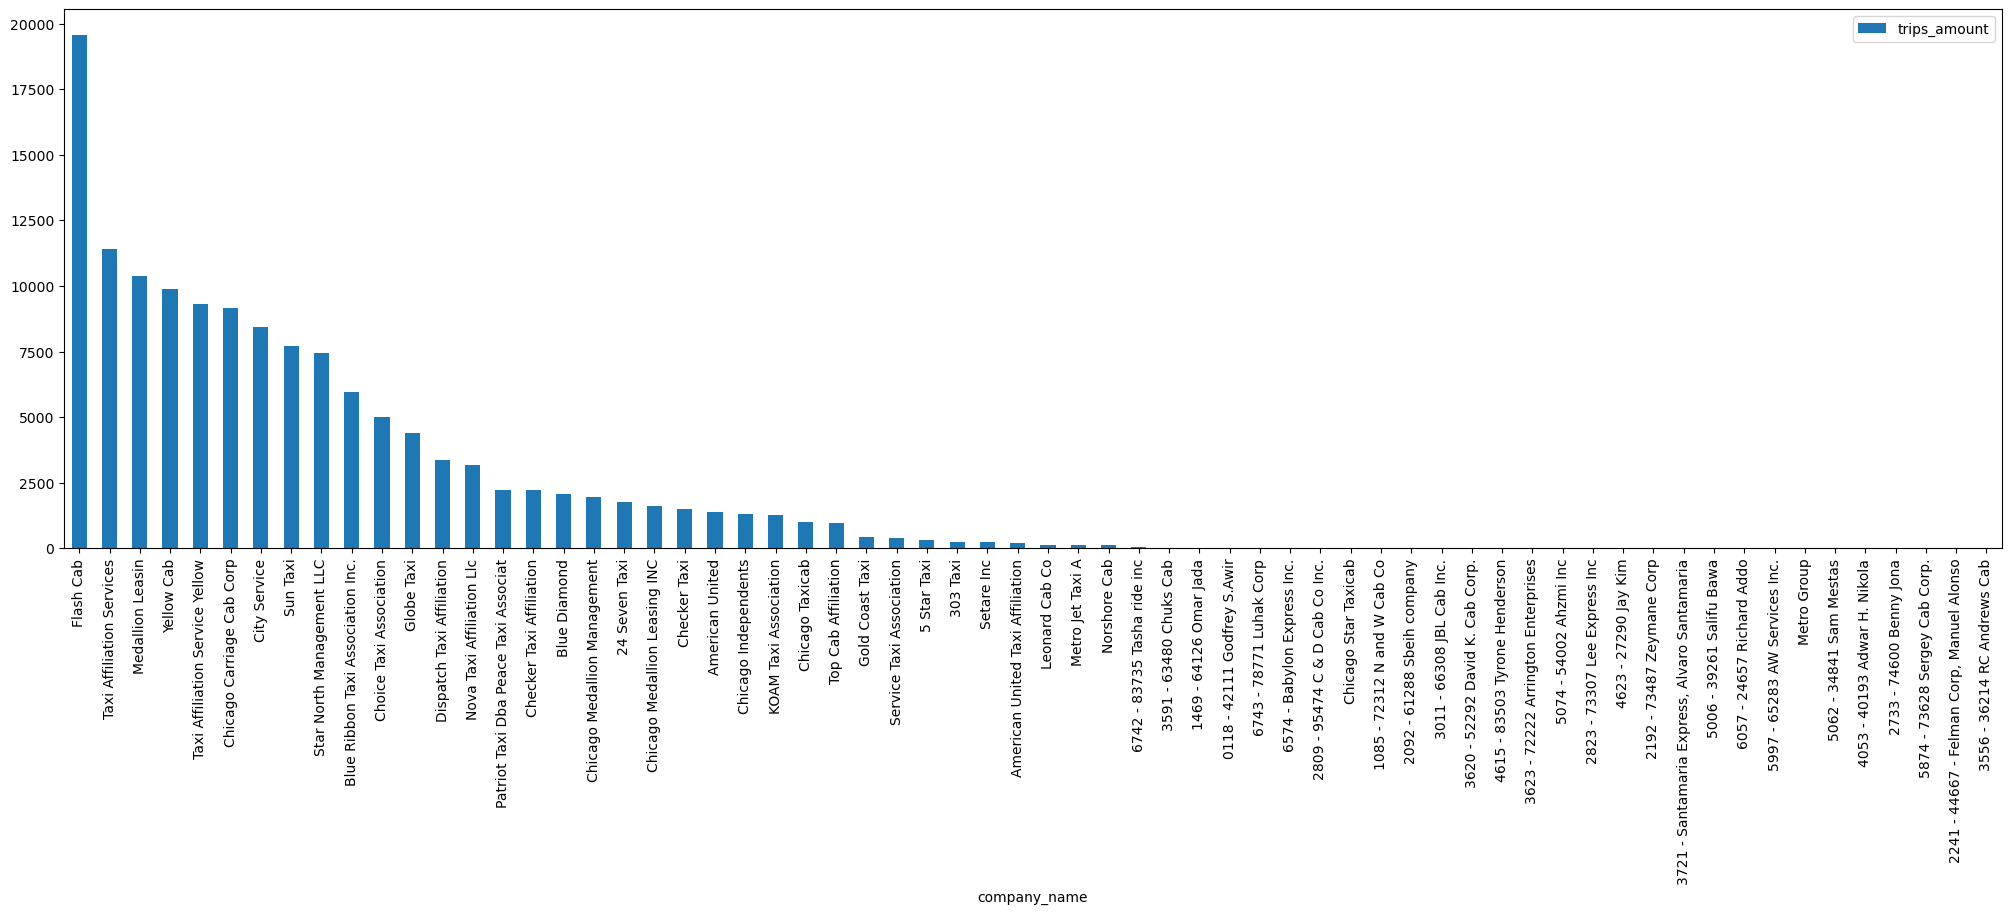

In [ ]:
#grafico empresas de taxi y numero de recorridos
taxi_pivot = company_amount_trips.pivot_table(index='company_name', values='trips_amount', aggfunc='sum').sort_values(by='trips_amount', ascending=False)
#top 10 taxis populares

taxi_pivot.plot(kind='bar', figsize=(25,7))
plt.show()

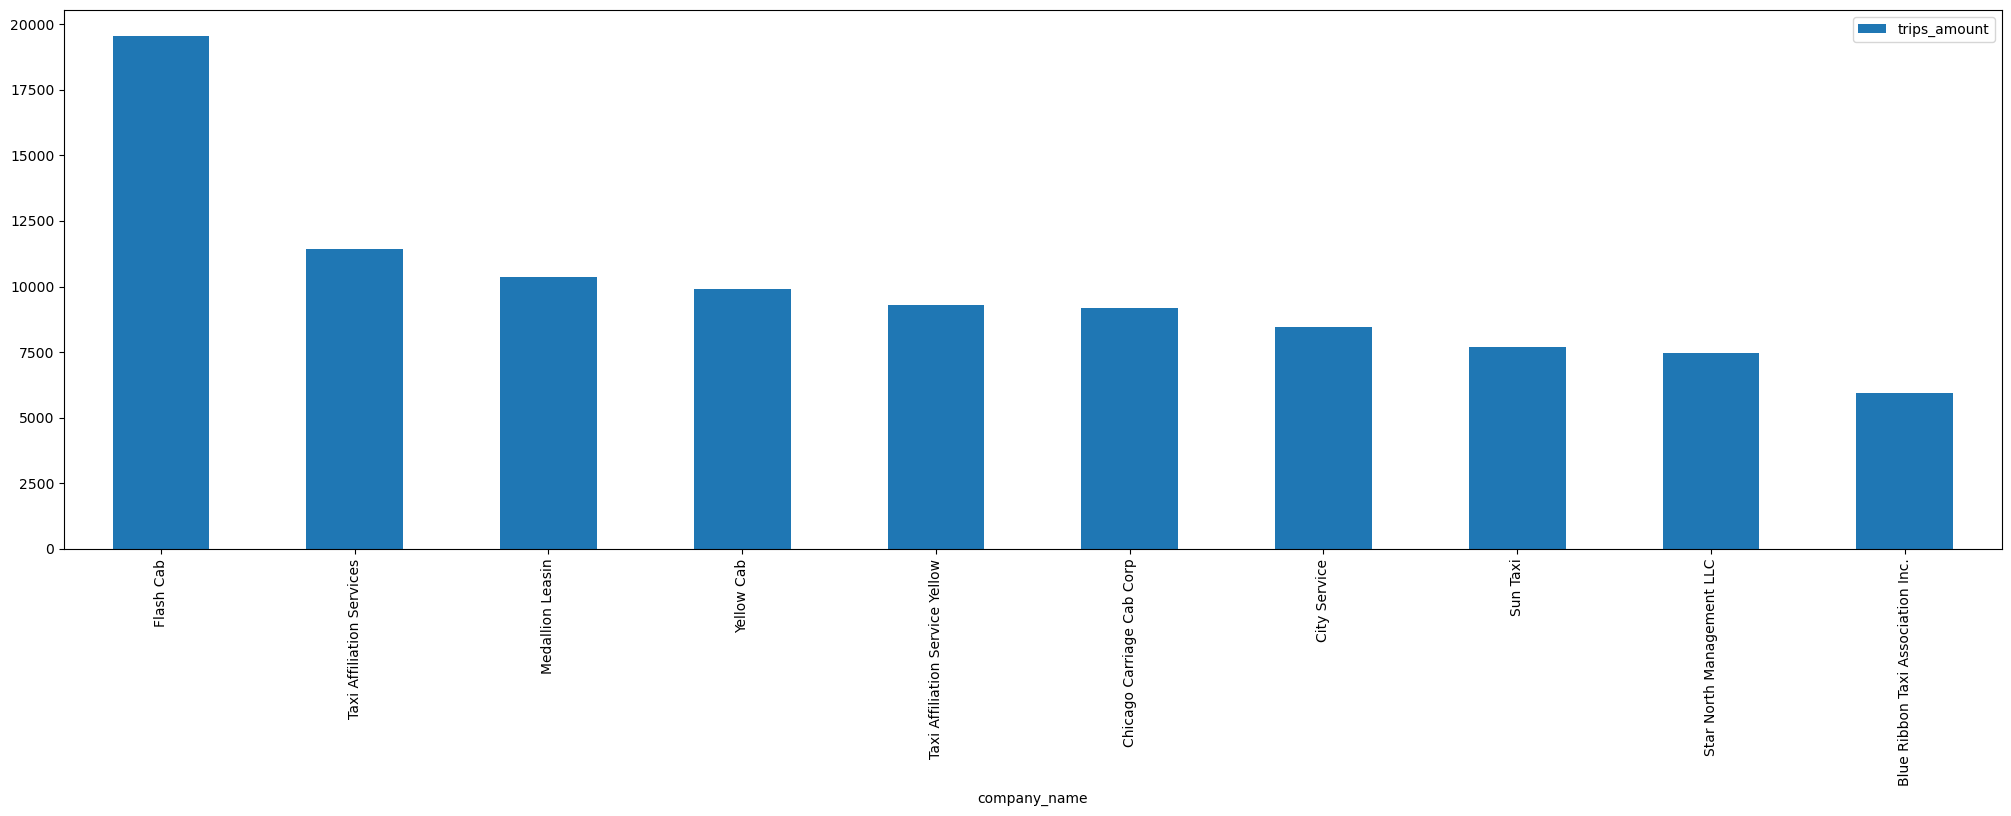

In [36]:
taxi_pivot.head(10).plot(kind='bar', figsize=(25,7))
plt.show()

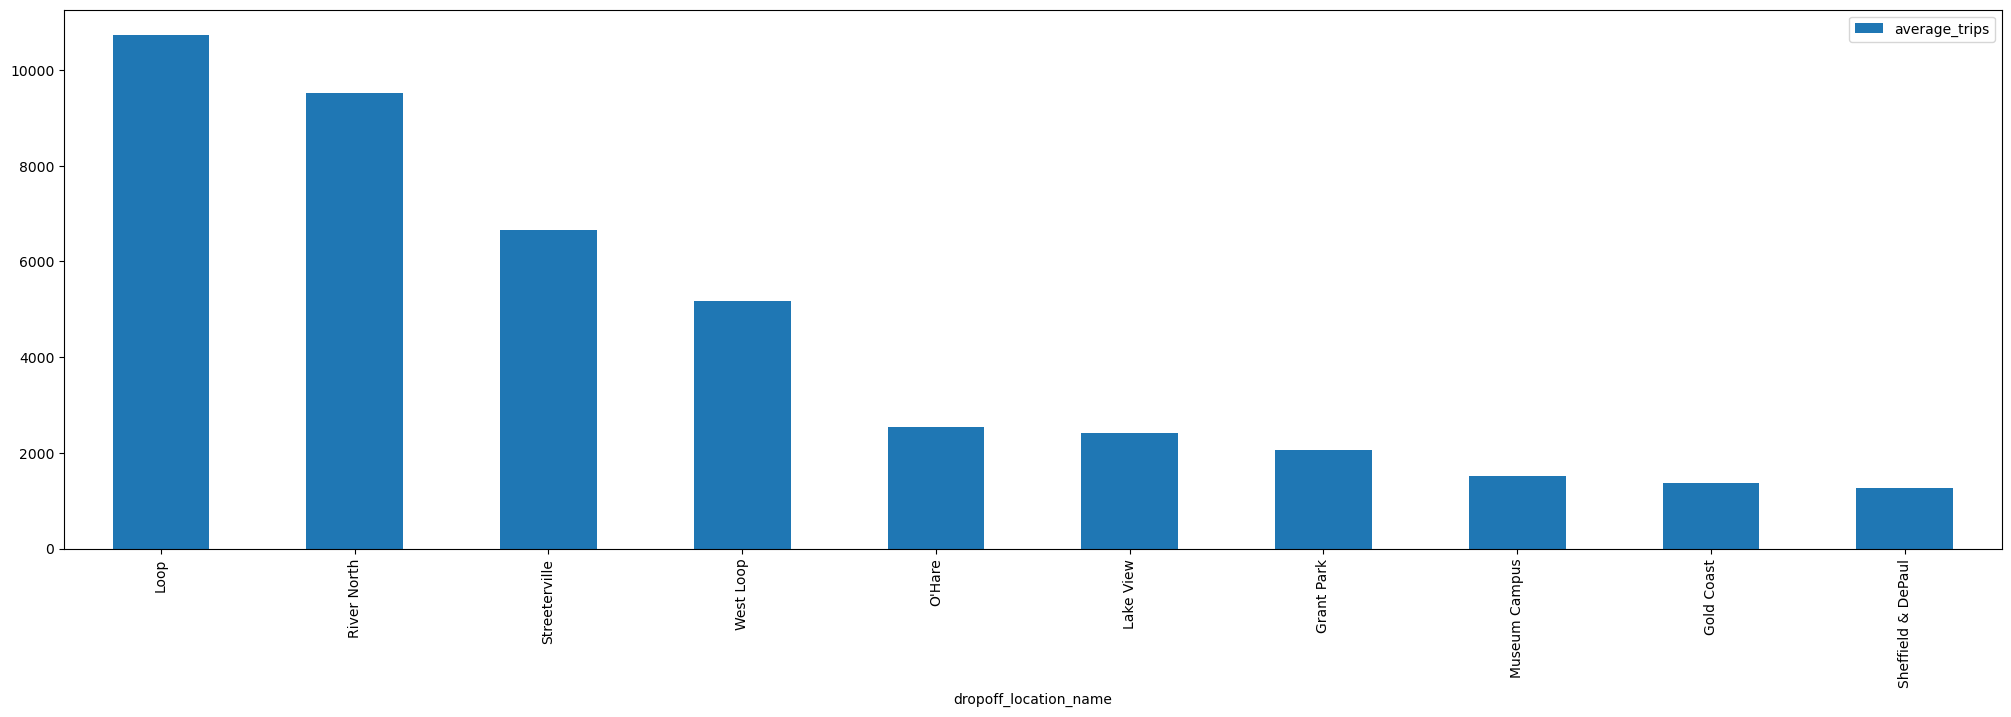

In [33]:
#grafico los 10 barrios con mayor cantidad de dropoff
end_location.head(10).plot(kind='bar', figsize=(25,7))
plt.show()

## Prueba de hipótesis (Python)

Probar la hispotesis:
"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


In [34]:
#observo los datos
print(start_weather_duration.shape)
start_weather_duration.sample(10).sort_values(by='start_ts')

(1068, 3)


,start_ts,weather_conditions,duration_seconds
321,2017-11-04 06:00:00,Good,1496.0
796,2017-11-04 14:00:00,Good,3000.0
360,2017-11-04 14:00:00,Good,2940.0
973,2017-11-04 19:00:00,Good,1748.0
450,2017-11-11 06:00:00,Good,1200.0
412,2017-11-11 07:00:00,Good,1335.0
830,2017-11-11 08:00:00,Good,1440.0
210,2017-11-11 20:00:00,Good,1500.0
527,2017-11-18 05:00:00,Good,1977.0
743,2017-11-18 07:00:00,Bad,1182.0


In [35]:
#HP0: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto O´Hare no cambia los sábados lluviosos"
#HP1: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

alfa = 0.1
rainy_sat = start_weather_duration[start_weather_duration['weather_conditions']== 'Bad']['duration_seconds'].mean()
sunny_sat = start_weather_duration[start_weather_duration['weather_conditions']== 'Good']['duration_seconds'].mean()

results = st.ttest_ind(rainy_sat, sunny_sat, equal_var=False)

if results.pvalue < alfa:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')


No rechazamos la hipótesis nula
